In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tqdm import tqdm

import pandas as pd
import random

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Import the libraries
import zipfile
import os

#To import the file successfully I recommend you keep the dataset in your Google drive 
#and copy the specific path as relative paths will lead to complications whith importing the dataset
zip_ref = zipfile.ZipFile('//content/drive/MyDrive/Colab Notebooks/archive.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [7]:
import pathlib
#had to import the dataset into my my local drive inside colabs
data_dir = "/tmp/LEGO brick images v1"

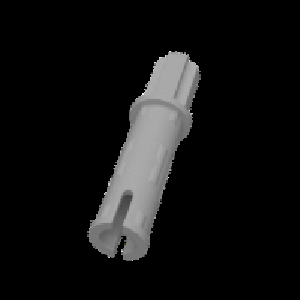

In [8]:
#This is a simple image of what the dataset lego bricks look like
path0='../tmp/LEGO brick images v1/11214 Bush 3M friction with Cross axle/201706171006-0001.png'
load_img(path0,target_size=(300,300))

In [9]:
#specify batch size
batch_size = 32
img_height = 180
img_width = 180

#create a tranning set 
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6379 files belonging to 16 classes.
Using 5104 files for training.


In [10]:
#create a validation set
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6379 files belonging to 16 classes.
Using 1275 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)
#there are 16 classes

['11214 Bush 3M friction with Cross axle', '18651 Cross Axle 2M with Snap friction', '2357 Brick corner 1x2x2', '3003 Brick 2x2', '3004 Brick 1x2', '3005 Brick 1x1', '3022 Plate 2x2', '3023 Plate 1x2', '3024 Plate 1x1', '3040 Roof Tile 1x2x45deg', '3069 Flat Tile 1x2', '32123 half Bush', '3673 Peg 2M', '3713 Bush for Cross Axle', '3794 Plate 1X2 with 1 Knob', '6632 Technic Lever 3M']


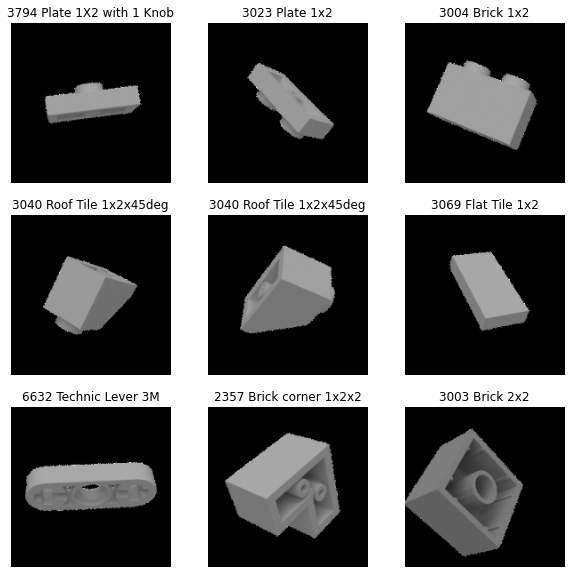

In [12]:
#look legos 0-0 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [13]:
#current batch size is 32 with 180 X 180 images and 3 channels
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [14]:
normalization_layer = layers.Rescaling(1./255)

In [15]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [18]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
print(history.validation_data)

Epoch 1/10
160/160 [==============================] - 172s 1s/step - loss: 0.8471 - accuracy: 0.7153 - val_loss: 0.4474 - val_accuracy: 0.8282
Epoch 2/10
160/160 [==============================] - 168s 1s/step - loss: 0.3166 - accuracy: 0.8783 - val_loss: 0.4007 - val_accuracy: 0.8604
Epoch 3/10
160/160 [==============================] - 169s 1s/step - loss: 0.1964 - accuracy: 0.9283 - val_loss: 0.3221 - val_accuracy: 0.8847
Epoch 4/10
160/160 [==============================] - 175s 1s/step - loss: 0.1524 - accuracy: 0.9387 - val_loss: 0.3931 - val_accuracy: 0.8620
Epoch 5/10
160/160 [==============================] - 172s 1s/step - loss: 0.1136 - accuracy: 0.9504 - val_loss: 0.2901 - val_accuracy: 0.8933
Epoch 6/10
160/160 [==============================] - 167s 1s/step - loss: 0.0945 - accuracy: 0.9612 - val_loss: 0.2833 - val_accuracy: 0.8957
Epoch 7/10
160/160 [==============================] - 168s 1s/step - loss: 0.0754 - accuracy: 0.9696 - val_loss: 0.2738 - val_accuracy: 0.9043

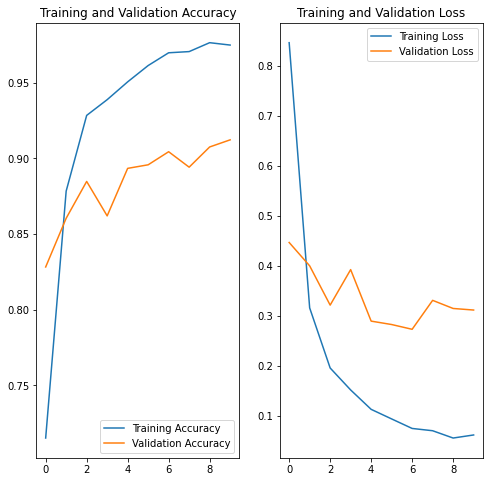

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
test_images = []
test_labels = []

for image, label in train_ds.take(1):
  test_images.append(image)
  for i in range(32):
      test_labels.append(label[i])


In [36]:
from sklearn.metrics import classification_report
import time
import numpy as np
start_time = time.time()
test_predictions = np.argmax(model.predict(test_images), axis=-1)
# Comparing the predictions to actual forest cover types for the test rows
# test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
print(classification_report(test_labels,test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Time taken to predict the model 0.3449575901031494


In [22]:
#when working with the model I did notice that it does have a hard time classifying class 7 and 14
#this is mainly do to the similaraties they have ubside down. 
print(class_names[7])
print(class_names[14])

3023 Plate 1x2
3794 Plate 1X2 with 1 Knob


Examples of Images that are hard to clasify

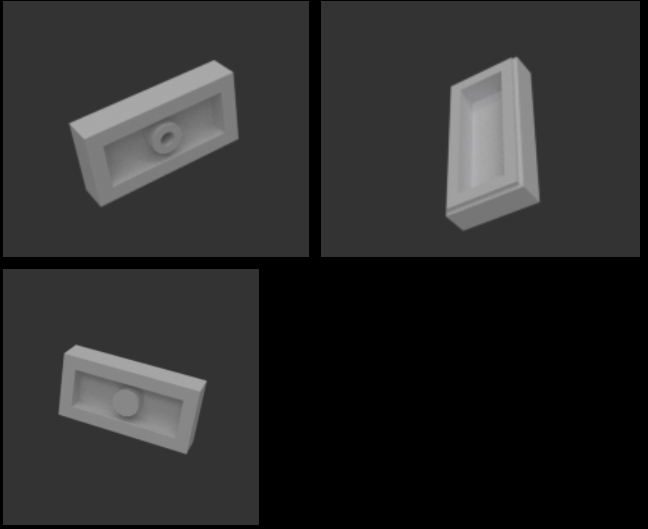